In [1]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

1. Read the data table as dataframe

In [2]:
data = pd.read_table("Res-AllTaps.txt", header='infer', delimiter='\t', decimal='.', na_values='NaN')

data.info()
data.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3550 entries, 0 to 3549
Data columns (total 11 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Sujet        3550 non-null   int64  
 1   Group        3550 non-null   int64  
 2   Severity     3550 non-null   int64  
 3   SSI          3550 non-null   int64  
 4   Music        3550 non-null   int64  
 5   Pattern      3550 non-null   int64  
 6   File         3550 non-null   int64  
 7   TrainNumber  3550 non-null   int64  
 8   BeatNumber   3550 non-null   int64  
 9   IRI          1237 non-null   float64
 10  RT           3333 non-null   float64
dtypes: float64(2), int64(9)
memory usage: 305.2 KB


,Sujet,Group,Severity,SSI,Music,Pattern,File,TrainNumber,BeatNumber,IRI,RT
0,2,0,0,0,1,1,1,1,1,NaN,-0.0265
1,2,0,0,0,1,1,1,1,2,0.5385,0.0115
2,2,0,0,0,1,1,1,1,3,0.5049,0.0139
3,2,0,0,0,1,1,1,1,4,0.4805,-0.0056
4,2,0,0,0,1,1,1,1,5,0.4686,-0.0371


2.Filter the dataframe to consider only a part of the data

In [3]:
data_periodic_along = data[data["Pattern"]==1]
data_aperiodic = data[data["Pattern"]==2]
data_PNS = data[(data["Pattern"]==1)&(data["Group"]==0)]
data_PWS = data[(data["Pattern"]==1)&(data["Group"]==1)]

3. Calculate the mean and standard deviation of a data set:

    We can see here that the mean is close to 0.5 as expected with little deviation.

In [4]:
mean_PNS=data_PNS['IRI'].mean(skipna=True)
mean_PWS=data_PWS['IRI'].mean(skipna=True)
std_PNS = data_PNS['IRI'].std(skipna=True)
std_PWS = data_PWS['IRI'].std(skipna=True)

print("IRI Mean: --------------")
print(f"|   PNS: {mean_PNS:.4f} ± {std_PNS:.4f}")
print(f"|   PWS: {mean_PWS:.4f} ± {std_PWS:.4f}")
print("------------------------")

IRI Mean: --------------
|   PNS: 0.4945 ± 0.0272
|   PWS: 0.4948 ± 0.0339
------------------------


4. Plot the mean value and standard deviation of the IRI for both groups (PWS and PNS) in the PeriodicAlong condition only.

    Here we can visualize what was computed in the previous question. We can see that for both groups the IRI is close to 0.5, however in the PWS group the standard deviation is bigger, meaning that the people who do not stuter have more consice response times close to the expected.

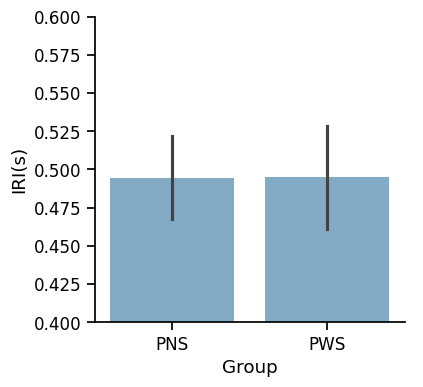

In [5]:
sns.set_context('notebook', font_scale=1.1, rc={'lines.width':1})

g = sns.catplot(data=data_periodic_along, kind='bar', x='Group', y='IRI', errorbar='sd', alpha=.6, height=4)
g.set_axis_labels("Group", "IRI(s)")
g.set(ylim=(0.4,0.6))
g.set_xticklabels(["PNS", "PWS"])

plt.show()

5. Graphically represent, for each group, the variation of the IRI over time (to detect possible acceleration or deceleration)

In [6]:
# Create new variable TapNb
data['TapNb'] = data['BeatNumber']+8*(data['TrainNumber']+1)
print(data.columns.values)

# Update filtered dataframes
data_periodic_along = data[data["Pattern"]==1]
data_aperiodic = data[data["Pattern"]==2]
data_PNS = data[(data["Pattern"]==1)&(data["Group"]==0)]
data_PWS = data[(data["Pattern"]==1)&(data["Group"]==1)]

['Sujet' 'Group' 'Severity' 'SSI' 'Music' 'Pattern' 'File' 'TrainNumber'
 'BeatNumber' 'IRI' 'RT' 'TapNb']


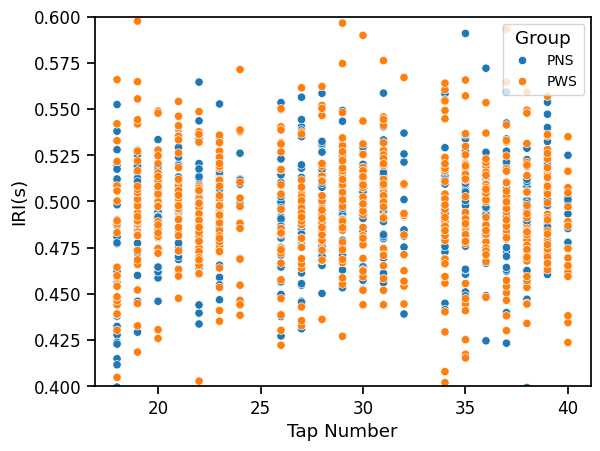

In [7]:
groups = {0:"PNS", 1:"PWS"}
g = sns.scatterplot(x='TapNb', y='IRI', hue='Group', data=data.assign(Group=data['Group'].map(groups)))
g.set_ylabel('IRI(s)')
g.set_xlabel("Tap Number")
g.legend(title="Group", loc='upper right', fontsize=10)
g.set(ylim=(0.4,0.6))
plt.show(g)

We separate it by group to study if theres acceleration or deceleration of IRI over time using linear regression models.

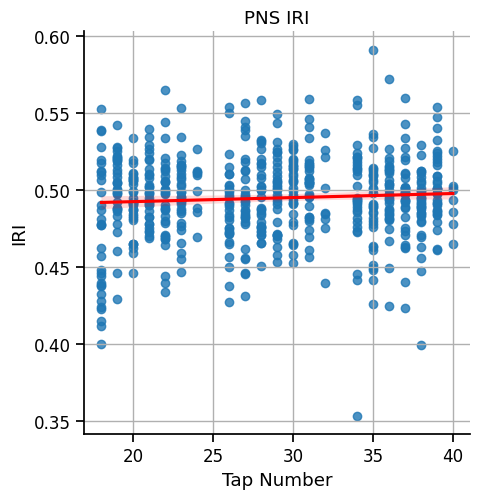

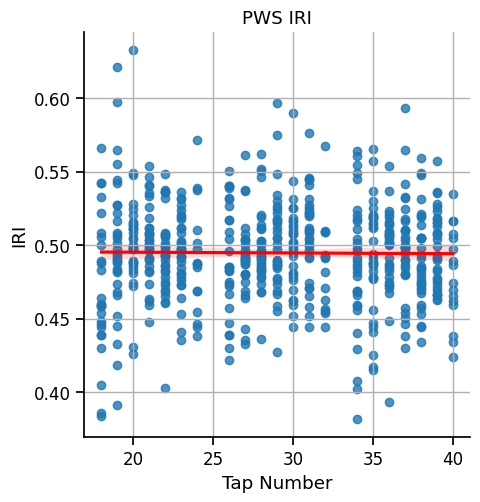

In [8]:
g_pns = sns.lmplot(x='TapNb', y='IRI', data=data_PNS, line_kws={'color': 'red'})
plt.title("PNS IRI")
plt.xlabel("Tap Number")    
plt.grid()
plt.show()

g_pws = sns.lmplot(x='TapNb', y='IRI', data=data_PWS, line_kws={'color': 'red'})
plt.title("PWS IRI")
plt.xlabel("Tap Number")
plt.grid()
plt.show()

The PNS graph shows an average IRI close to 0.5 seconds, consistent with stable tapping behavior, showing only a sligh acceleration over time. In contrast, the PWS graph shows similar variability but without a clear global trend of acceleration or deceleration, suggesting no significant systematic shift in IRI over time.


We can also repeat the same process to analyze RT over time. With RT showing a clear deceleration for PNS and  less pronounced trend for PWS.

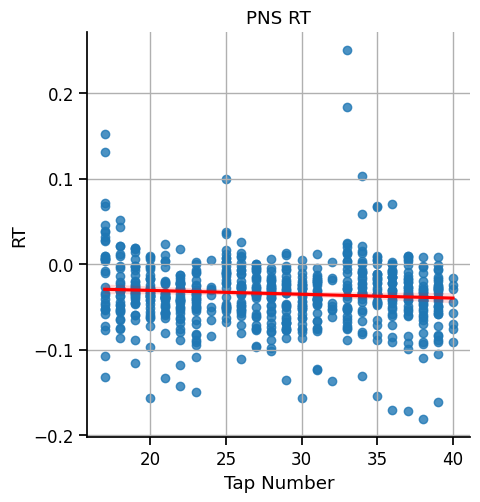

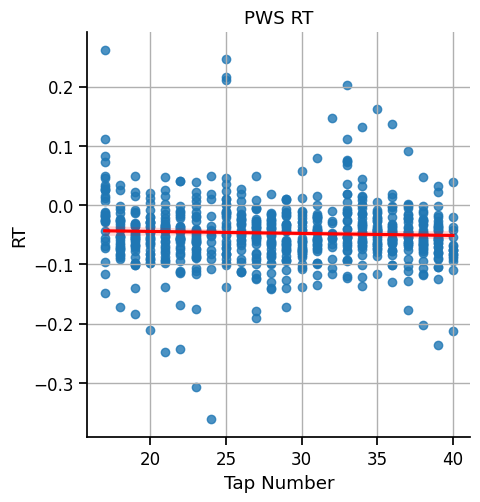

In [61]:
g_pns = sns.lmplot(x='TapNb', y='RT', data=data_PNS, line_kws={'color': 'red'})
plt.title("PNS RT")
plt.xlabel("Tap Number")    
plt.grid()
plt.show()

g_pws = sns.lmplot(x='TapNb', y='RT', data=data_PWS, line_kws={'color': 'red'})
plt.title("PWS RT")
plt.xlabel("Tap Number")
plt.grid()
plt.show()

6. Plot, for each group, the mean value and standard deviation of the IRI for both groups (PWSand PNS) in the PeriodicAlong condition only

In [9]:
dataTrain = pd.read_table("Res-StdIRI.txt", header='infer', delimiter='\t', decimal='.', na_values='NaN')

data.info()
data.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3550 entries, 0 to 3549
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Sujet        3550 non-null   int64  
 1   Group        3550 non-null   int64  
 2   Severity     3550 non-null   int64  
 3   SSI          3550 non-null   int64  
 4   Music        3550 non-null   int64  
 5   Pattern      3550 non-null   int64  
 6   File         3550 non-null   int64  
 7   TrainNumber  3550 non-null   int64  
 8   BeatNumber   3550 non-null   int64  
 9   IRI          1237 non-null   float64
 10  RT           3333 non-null   float64
 11  TapNb        3550 non-null   int64  
dtypes: float64(2), int64(10)
memory usage: 332.9 KB


,Sujet,Group,Severity,SSI,Music,Pattern,File,TrainNumber,BeatNumber,IRI,RT,TapNb
0,2,0,0,0,1,1,1,1,1,NaN,-0.0265,17
1,2,0,0,0,1,1,1,1,2,0.5385,0.0115,18
2,2,0,0,0,1,1,1,1,3,0.5049,0.0139,19
3,2,0,0,0,1,1,1,1,4,0.4805,-0.0056,20
4,2,0,0,0,1,1,1,1,5,0.4686,-0.0371,21


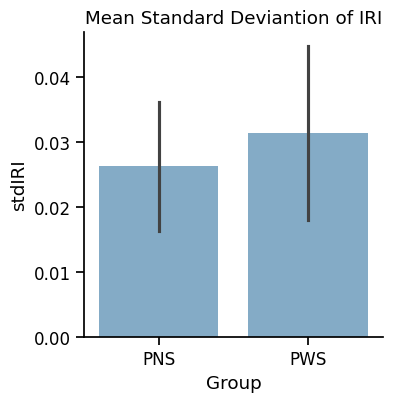

In [14]:
sns.set_context('notebook', font_scale=1.1, rc={'lines.width':1})

g = sns.catplot(data=dataTrain, kind='bar', x='Group', y='stdIRI', errorbar='sd', alpha=.6, height=4)
g.set_axis_labels("Group", "stdIRI")
g.set_xticklabels(["PNS", "PWS"])
plt.title("Mean Standard Deviantion of IRI")
plt.show()

The standard deviation of IRI is lower in the PNS group compared to the PWS group. This indicates reduced variability in tapping intervals for PNS, aligning with more consistent and stable timing behavior relative to PWS.

7. Plot, for each group, the distribution of RT values in the Aperiodic condition for both groups (PWS and PNS).

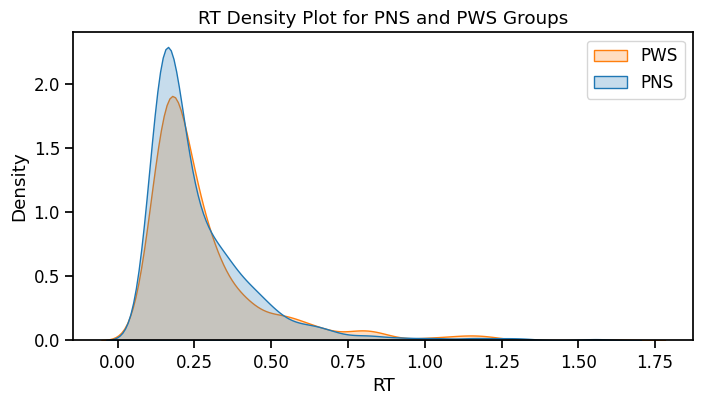

In [79]:
plt.figure(figsize=(8, 4)) 
sns.kdeplot(data=data_aperiodic, x="RT", hue="Group", common_norm=True, fill=True)
plt.title("RT Density Plot for PNS and PWS Groups")
plt.legend(["PWS", "PNS"])
plt.show()


The density plot shows an inverse gaussian like distribution of RT for both groups, with PWS displaying a slightly broader distribution and longer RT. This aligns with expectations of more consistent and faster response times in PNS, compared to PWS, in the aperiodic condition.

8. Plot the mean value and standard deviation of RT for the two groups (PWS and PNS) under the two conditions PeriodicAlong and Aperiodic.

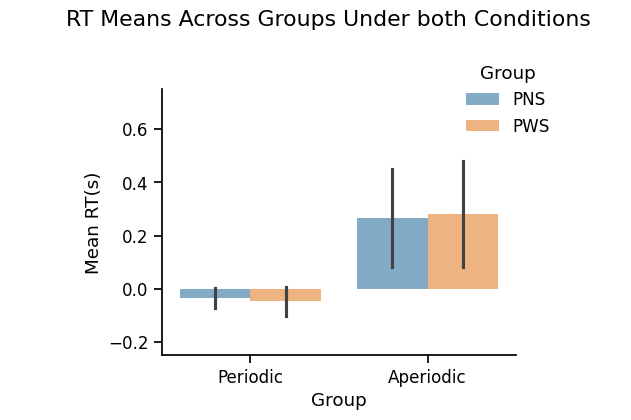

In [72]:
g = sns.catplot(data=data, kind="bar",x="Pattern", y="RT", hue="Group",errorbar='sd', alpha=.6, height=4)
g.set_axis_labels("Group", "Mean RT(s)")
g.set_xticklabels(["Periodic","Aperiodic"])
g.set(ylim=(-0.25, 0.75))
g.fig.suptitle("        RT Means Across Groups Under both Conditions", y=1.05)  # y adjusts the vertical position
new_labels = ["PNS", "PWS"]  # New legend labels for 0 and 1
for t, l in zip(g.legend.texts, new_labels):
    t.set_text(l)
g.legend.set_bbox_to_anchor((1.2, 0.8))  # Place the legend outside to the right
g.legend.set_title("Group")  # Ensure the title is clear
plt.tight_layout()
plt.show()

In the periodic condition the mean RT for PNS is negative and close to 0, as one could expect, however here for PWS it remains negative, contradicting expectations. 

In the aperiodic condition, we verify that the mean RTs are indeed positive with both groups show longer RTs with PWS exhibiting slightly higher mean RTs and greater variability compared to PNS, aligning with expected patterns